<a href="https://colab.research.google.com/github/DanielKinnito/RMS-Traffic_Analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install opendatasets

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer


In [11]:
od.download(
    "https://www.kaggle.com/datasets/deeksha2703/accident-vehicle-information")

Skipping, found downloaded files in "./accident-vehicle-information" (use force=True to force download)


## Data Collection
In this cell, we will load the accident and vehicle datasets.
We limit the data to the first 200,000 rows for quicker processing.


In [12]:
# Data Collection
accident_data = pd.read_csv("accident-vehicle-information/Accident_Information.csv", nrows=200000)


## Data Preprocessing
In this cell, we will clean the data by removing unnecessary columns.


In [13]:
# Data Preprocessing
# Cleaning the Data
# Remove unnecessary columns
columns_to_drop = [
    "Accident_Index",
    "Longitude",
    "Latitude",
    "Location_Easting_OSGR",
    "Location_Northing_OSGR",
    "Date",
    "Time",
]
accident_data_cleaned = accident_data.drop(columns=columns_to_drop)


## Handling Missing Values
In this cell, we will handle missing values for both numeric and categorical columns.


In [14]:
# Separate columns into numeric and categorical
numeric_columns = accident_data_cleaned.select_dtypes(include=[np.number]).columns
categorical_columns = accident_data_cleaned.select_dtypes(exclude=[np.number]).columns


In [15]:
# Handle missing values for numeric columns (using median)
imputer_numeric = SimpleImputer(strategy='median')
accident_data_cleaned[numeric_columns] = imputer_numeric.fit_transform(accident_data_cleaned[numeric_columns])


In [16]:
# Handle missing values for categorical columns (using the mode)
imputer_categorical = SimpleImputer(strategy='most_frequent')
accident_data_cleaned[categorical_columns] = imputer_categorical.fit_transform(accident_data_cleaned[categorical_columns])


## Feature Engineering
In this cell, we will encode categorical variables and standardize continuous variables.


In [17]:
# Feature Engineering
# Encoding categorical variables using LabelEncoder
for col in categorical_columns:
    if col in accident_data_cleaned.columns:  # Ensure column exists
        accident_data_cleaned[col] = LabelEncoder().fit_transform(accident_data_cleaned[col])


In [18]:
# Standardizing continuous variables (e.g., 'Speed_limit')
scaler = StandardScaler()
if "Speed_limit" in accident_data_cleaned.columns:
    accident_data_cleaned["Speed_limit"] = scaler.fit_transform(accident_data_cleaned[["Speed_limit"]])


## Exploratory Data Analysis (EDA)
In this cell, we will visualize the distribution of 'Accident_Severity' and analyze feature correlations.


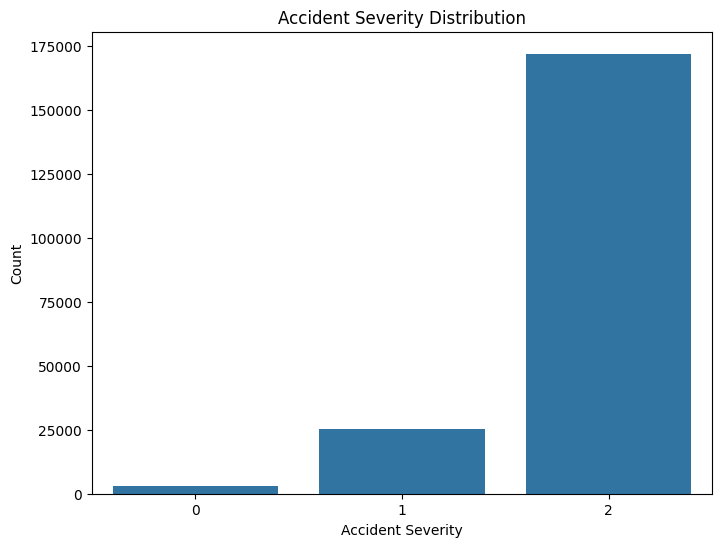

In [19]:
# Exploratory Data Analysis (EDA)
# Visualizing the distribution of 'Accident_Severity'
plt.figure(figsize=(8, 6))
sns.countplot(data=accident_data_cleaned, x="Accident_Severity")
plt.title("Accident Severity Distribution")
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.show()


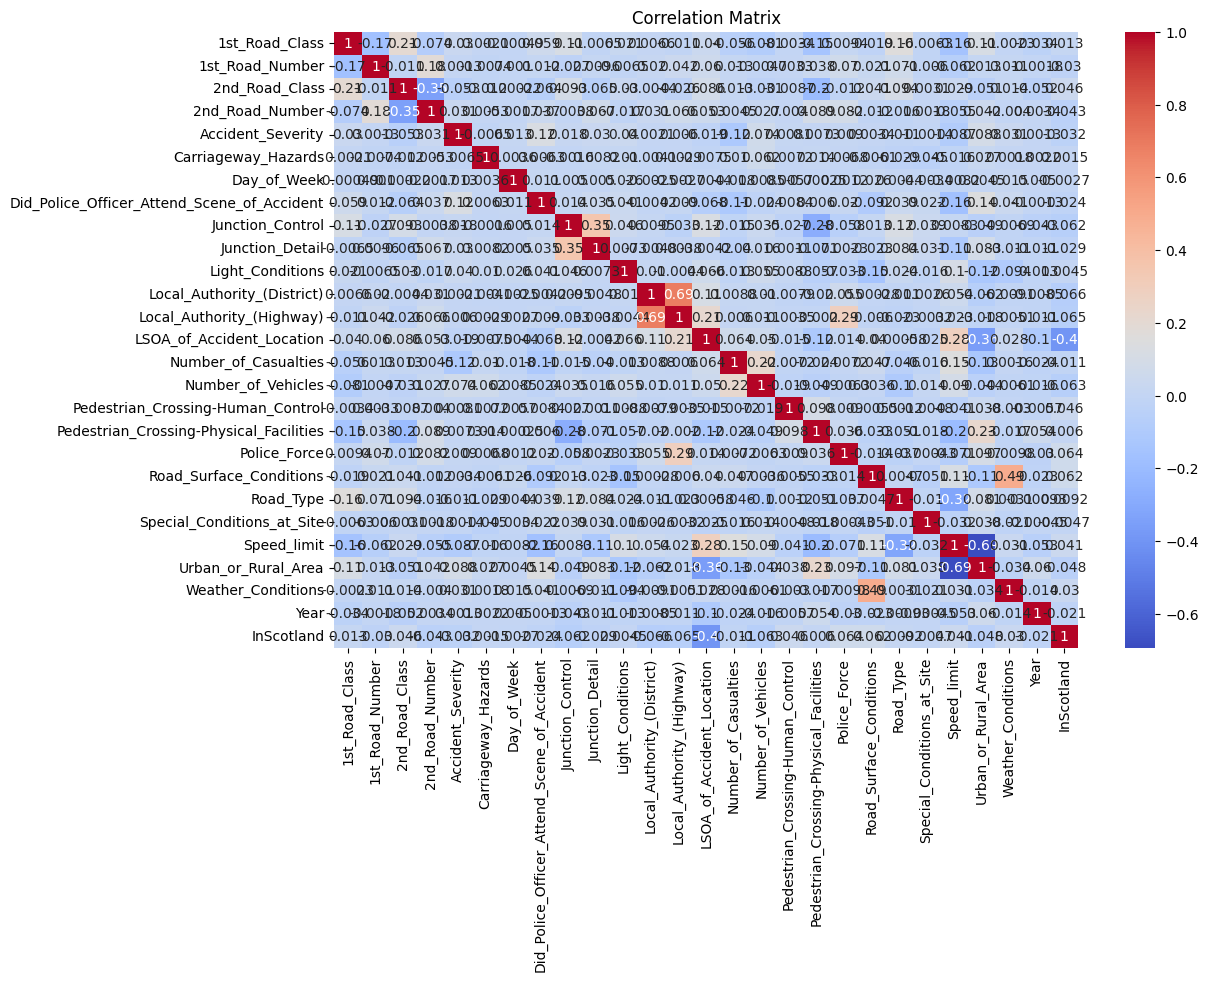

In [20]:
# Correlation matrix (if needed to analyze feature correlations)
correlation_matrix = accident_data_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Feature Selection
In this cell, we will select the top 10 features using SelectKBest.


In [21]:
# Feature Selection
# Selecting top 10 features using SelectKBest
X = accident_data_cleaned.drop("Accident_Severity", axis=1)
y = accident_data_cleaned["Accident_Severity"]
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


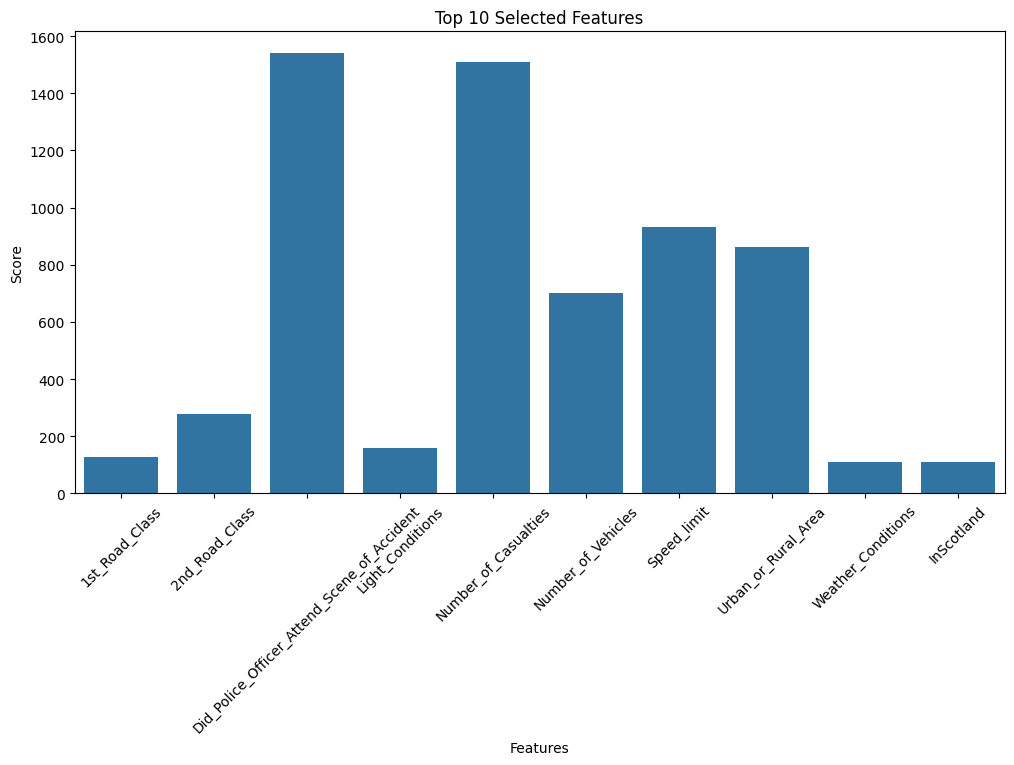

In [22]:
# Visualizing selected features
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=selector.scores_[selector.get_support()])
plt.title("Top 10 Selected Features")
plt.xlabel("Features")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


## Splitting Data
In this cell, we will split the data into training and testing sets.


In [23]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)


## Training Random Forest Model
In this cell, we will train a Random Forest model.


In [24]:
# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluating Random Forest Model
In this cell, we will evaluate the Random Forest model using accuracy and classification report.


In [25]:
# Model Evaluation
# Predictions and evaluation using accuracy and classification report
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.855425
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.01      0.02       552
           1       0.24      0.02      0.04      4991
           2       0.86      0.99      0.92     34457

    accuracy                           0.86     40000
   macro avg       0.40      0.34      0.33     40000
weighted avg       0.78      0.86      0.80     40000



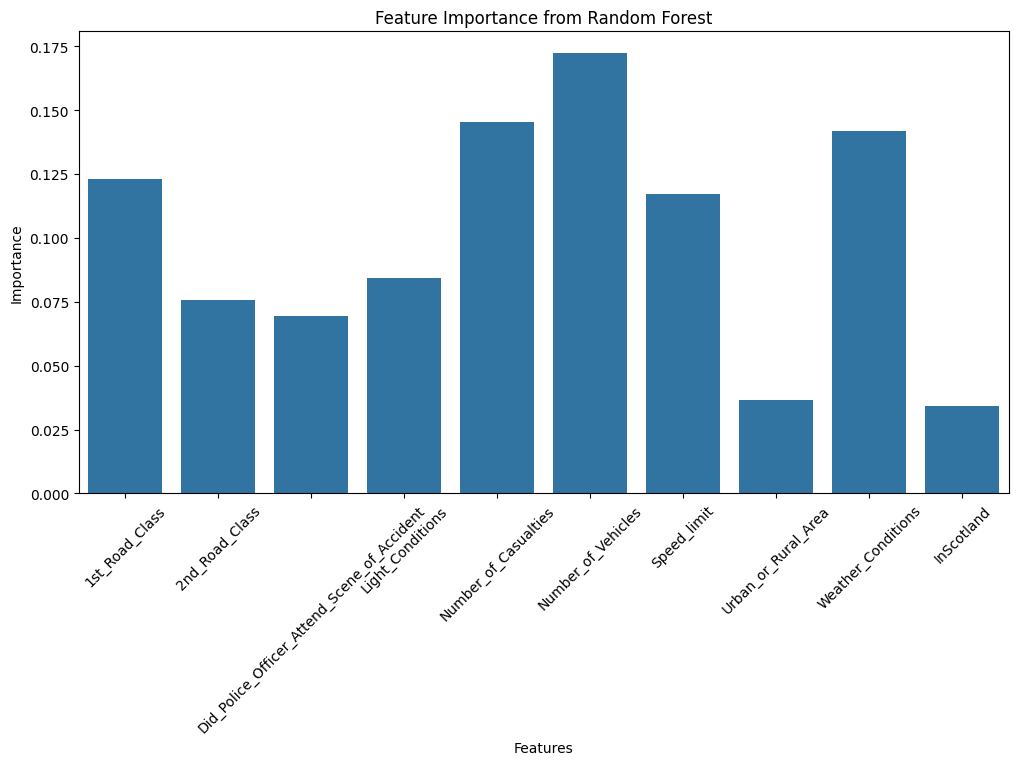

In [26]:
# Visualizing feature importance from Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=rf_model.feature_importances_)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


## Training Gradient Boosting Model
In this cell, we will train a Gradient Boosting model.


In [27]:
# Training a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

## Evaluating Gradient Boosting Model
In this cell, we will evaluate the Gradient Boosting model using accuracy and classification report.


In [28]:
# Model Evaluation
# Predictions and evaluation using accuracy and classification report
y_pred_gb = gb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Accuracy: 0.861225
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.00      0.01       552
           1       0.37      0.00      0.01      4991
           2       0.86      1.00      0.93     34457

    accuracy                           0.86     40000
   macro avg       0.46      0.34      0.31     40000
weighted avg       0.79      0.86      0.80     40000



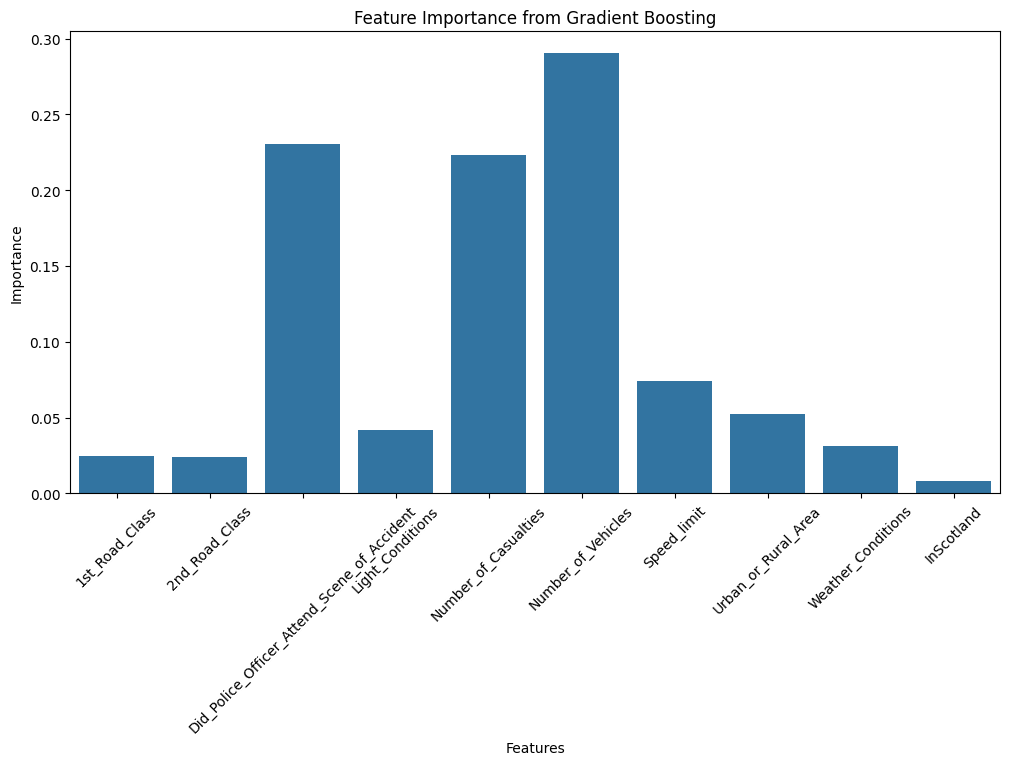

In [29]:
# Visualizing feature importance from Gradient Boosting
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=gb_model.feature_importances_)
plt.title("Feature Importance from Gradient Boosting")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


## Hyperparameter Tuning
In this cell, we will perform hyperparameter tuning for the Gradient Boosting model using GridSearchCV.


In [30]:
# Hyperparameter Tuning for Gradient Boosting model
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]})

## Best Model Evaluation
In this cell, we will evaluate the best model obtained from GridSearchCV.


In [31]:
# Best model evaluation
best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best_gb)}")
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best_gb))


Best Model Accuracy: 0.861425
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       552
           1       0.00      0.00      0.00      4991
           2       0.86      1.00      0.93     34457

    accuracy                           0.86     40000
   macro avg       0.29      0.33      0.31     40000
weighted avg       0.74      0.86      0.80     40000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


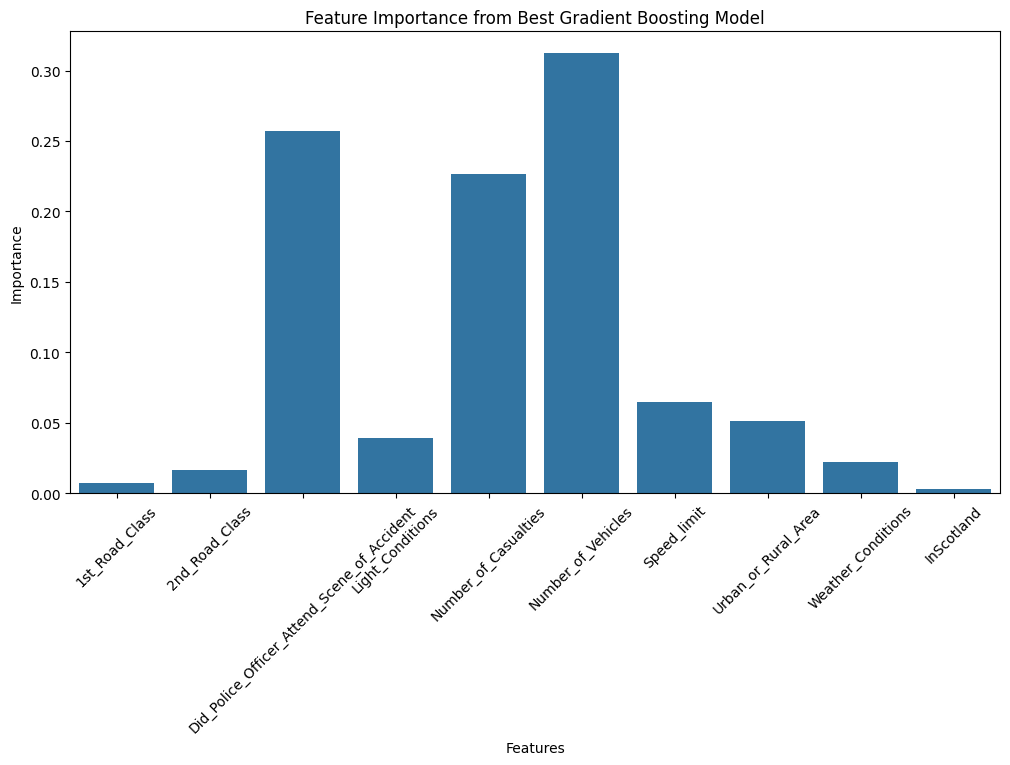

In [32]:
# Visualizing feature importance from the best Gradient Boosting model
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=best_gb_model.feature_importances_)
plt.title("Feature Importance from Best Gradient Boosting Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()